# EJERCICIO SOBRE LA COMPLEJIDAD DE H Y EL RUIDO (5 PUNTOS)

In [ ]:
# -*- coding: utf-8 -*-
"""
TRABAJO 2
Nombre Estudiante: Fernando Luque de la Torre 
"""
import numpy as np
import matplotlib.pyplot as plt

def simula_unif(N, dim, rango):
	return np.random.uniform(rango[0],rango[1],(N,dim))

def simula_gauss(N, dim, sigma):
    media = 0    
    out = np.zeros((N,dim),np.float64)        
    for i in range(N):
        # Para cada columna dim se emplea un sigma determinado. Es decir, para 
        # la primera columna (eje X) se usará una N(0,sqrt(sigma[0])) 
        # y para la segunda (eje Y) N(0,sqrt(sigma[1]))
        out[i,:] = np.random.normal(loc=media, scale=np.sqrt(sigma), size=dim)
    
    return out

## Ejercicio 1 (1 punto)
Dibujar gráficas con las nubes de puntos simuladas con las siguientes condiciones:

### Apartado a)
Considere $N=50, dim=2$ y $rango=[-50,50]$ con $simula\_unif(N,dim,rango)$

En primer lugar, generamos una nube de puntos con los valores que nos indica, y definimos la función para mostrarla. Estos puntos aún no tienen clasificación de ningún tipo.

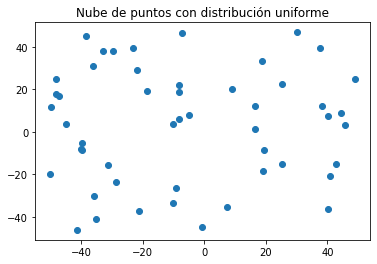

In [ ]:
np.random.seed(1)
xunif = simula_unif(50, 2, [-50,50])

#CODIGO DEL ESTUDIANTE
plt.title("Nube de puntos con distribución uniforme")
plt.scatter(xunif[:,0], xunif[:,1])

Como vemos esta nube de puntos, al estar generada por una distribución de probabilidad uniforme, no sigue ninguna tendencia, simplemente son puntos distribuidos aleatoriamente en el espacio indicado.

### Apartado b)
Considere $N=50, dim=2$ y $sigma=[5,7]$ con $simula\_gauss(N,dim,sigma)$

De nuevo generamos otra nube de puntos y mostramos

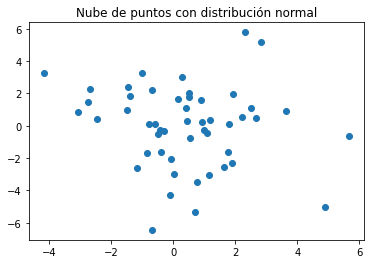

In [ ]:
xgauss = simula_gauss(50, 2, np.array([5,7]))
#CODIGO DEL ESTUDIANTE
plt.title("Nube de puntos con distribución normal")
plt.scatter(xgauss[:,0],xgauss[:,1])

## Ejercicio 2
Vamos a valorar la influencia del ruido en la selección de la complejidad de la clase de funciones. Con ayuda de la función $simula\_unif(100, 2, [−50, 50])$ generamos una muestra de puntos 2D a los que vamos a añadir una etiqueta usando el signo de la función $f(x, y) = y − ax − b$, es decir el signo de la distancia de cada punto a la recta simulada con $simula\_recta()$.\

---
En todo lo que sigue, utilizaré el término **etiquetar** para referirme a asignar los valores $y_n$ correspondientes a los $x_n$ y el término **clasificar** para hablar de predicciones, es decir, al clasificar no modifico los valores de $y_n$

### Apartado a)
(1 punto) Dibujar un gráfico 2D donde los puntos muestren (use colores) el resultado de su etiqueta. Dibuje también la recta usada para etiquetar. Observe que todos los puntos están bien clasificados respecto de la recta.

In [ ]:
def simula_recta(intervalo):
    points = np.random.uniform(intervalo[0], intervalo[1], size=(2, 2))
    x1 = points[0,0]
    x2 = points[1,0]
    y1 = points[0,1]
    y2 = points[1,1]
    # y = a*x + b
    a = (y2-y1)/(x2-x1) # Calculo de la pendiente.
    b = y1 - a*x1       # Calculo del termino independiente.
    
    return a, b

# La funcion np.sign(0) da 0, lo que nos puede dar problemas
def signo(x):
	if x >= 0:
		return 1
	return -1

def f(x, y, a, b):
	return signo(y - a*x - b)

Utilizamos las funciones definidas para generar la nube de puntos y generar también la recta que se va a encargar de separar dichos puntos

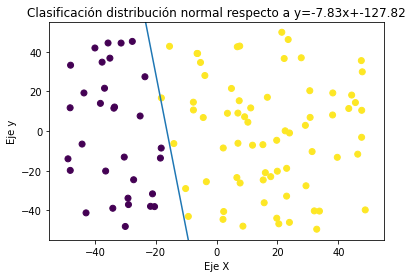

In [ ]:
# CODIGO DEL ESTUDIANTE
# Generamos la nueva nube de puntos
N = 100
rango = [-50,50]
np.random.seed(0)
x = simula_unif(N, 2, rango)

# Generamos una recta aleatoria que separe los puntos de la nube
a, b = simula_recta(rango)

# Clasificamos esos puntos según la recta
y = np.zeros(100)
for i in range(len(x)):
  y[i] = f(x[i,0],x[i,1],a,b)

# Función que muestra la recta y los puntos
def muestra_puntos_recta(x, y,a,b, title="Clasificación de puntos", xaxis="Eje X", yaxis="Eje y"):
  plt.xlabel(xaxis)
  plt.title(title)
  plt.ylabel(yaxis)
  rectax = np.linspace(-50,50)
  rectay = np.zeros(rectax.size)
  for i in range(rectax.size):
    rectay[i] = a*rectax[i]+b
  plt.plot(rectax, rectay)
  plt.scatter(x[:,0],x[:,1], c=y)
  plt.ylim(-np.max(x[:,1])-5, 5+np.max(x[:,1]))
  plt.show()

titulo = "Clasificación distribución normal respecto a y="+str(np.around(a,2))+"x+"+str(np.around(b,2))
muestra_puntos_recta(x,y,a,b,title=titulo)

Tal y como nos dice, es obvio que todos los puntos están bien **clasificados** pues es la propia recta la que los **etiqueta**.

### Apartado b)
(0.5 puntos) Modifique de forma aleatoria un 10 % de las etiquetas positivas y otro 10 % de las negativas y guarde los puntos con sus nuevas etiquetas. Dibuje de nuevo la gráfica anterior. Ahora habrá puntos mal clasificados respecto de la recta.

In [ ]:
# CODIGO DEL ESTUDIANTE
def cambia_10percent(y):
  # Contamos cuantos son el 10% de cada clase
  unique, counts = np.unique(y, return_counts=True)
  contadores = dict(zip(unique, counts))
  if -1 in contadores:
    contadores[-1] = np.around(contadores[-1]/10,0)
  else:
    contadores[-1] = 0
  if 1 in contadores:
    contadores[1]  = np.around(contadores[1]/10,0)
  else:
    contadores[1] = 0

  # Creamos un array de indices para cambiar aleatoriamente el signo de los 
  # elementos indicados por los primeros índices después de barajar
  indices = np.arange(y.size)
  np.random.seed(1)
  np.random.shuffle(indices)
  i=0

  y_copia = np.copy(y)
  # Vamos recorriendo el vector hasta cambiar el 10% de cada clase
  while (contadores[1]>0)or(contadores[-1]>0):
    ind = indices[i]
    if (y_copia[ind]==-1) and (contadores[-1]>0):
      y_copia[ind] *= -1
      contadores[-1] -= 1

    elif (y_copia[ind]==1) and (contadores[1]>0):
      y_copia[ind] *= -1
      contadores[1] -= 1
    i+=1
  return y_copia


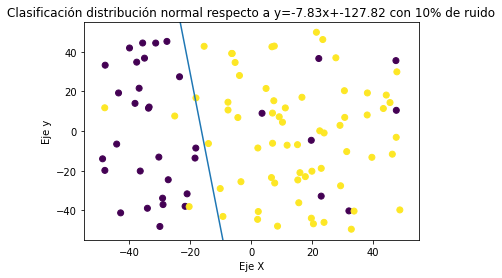

In [ ]:
# Cambiamos el 10% de cada clase
y_copia = cambia_10percent(y)
# y mostramos la clasificación respecto a la resta anterior
titulo = "Clasificación distribución normal respecto a y="+str(np.around(a,2))+"x+"+str(np.around(b,2))+ " con 10% de ruido"
muestra_puntos_recta(x, y_copia, a, b,title = titulo)

Ahora, es obvio que el 10% de los puntos de cada clase están mal clasificados, como podemos ver:

Porcentaje de fallos:  10.0 %


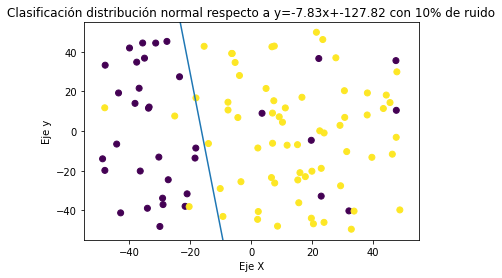

In [ ]:
def porcentaje_errores(x, y, a, b):
  errores = 0
  for i in range(y.size):
    if f(x[i,0],x[i,1],a,b)!=y[i]:
      errores+=1
  return errores/y.size*100

print("Porcentaje de fallos: ", porcentaje_errores(x,y_copia,a,b), "%")
titulo = "Clasificación distribución normal respecto a y="+str(np.around(a,2))+"x+"+str(np.around(b,2))+ " con 10% de ruido"
muestra_puntos_recta(x,y_copia, a,b,title=titulo)

Obviamente, si hemos introducido un 10% de ruido, ahora la predicción (que no es una predicción sino la propia función objetivo) fallará en un 10%.\
Vamos a analizar ahora que, el escoger una función compleja, no significará un mejor resultado para esta clasificación.

### Apartado c)
Supongamos ahora que las siguientes funciones definen la frontera de clasificación de los puntos de la muestra en lugar de una recta
* $f(x,y)=(x-10)^2+(y-20)^2-400$
* $f(x, y) = 0,5(x + 10)^2 + (y − 20)^2 − 400$
* $f(x, y) = 0,5(x-10)^2-(y + 20)^2 − 400$
* $f(x,y)=y-20x^2-5x+3$

Visualizar el etiquetado generado en el apartado 2b junto con la gráfica de cada una de las funciones. Comparar las regiones positivas y negativas de estas nuevas funciones con las obtenidas en el caso de la recta. Argumente si estas funciones más complejas son mejores clasificadores que la función lineal. Observe las gráficas y diga qué consecuencias extrae sobre la influencia de la modificación de etiquetas en el proceso de aprendizaje. Explique el razonamiento.

In [ ]:
def plot_datos_cuad(X, y, fz, title='Point cloud plot', xaxis='x axis', yaxis='y axis'):
    #Preparar datos
    min_xy = X.min(axis=0)
    max_xy = X.max(axis=0)
    border_xy = (max_xy-min_xy)*0.01
    
    #Generar grid de predicciones
    xx, yy = np.mgrid[min_xy[0]-border_xy[0]:max_xy[0]+border_xy[0]+0.001:border_xy[0], 
                      min_xy[1]-border_xy[1]:max_xy[1]+border_xy[1]+0.001:border_xy[1]]
    grid = np.c_[xx.ravel(), yy.ravel(), np.ones_like(xx).ravel()]
    pred_y = fz(grid)
    # pred_y[(pred_y>-1) & (pred_y<1)]
    pred_y = np.clip(pred_y, -1, 1).reshape(xx.shape)
    
    #Plot
    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, pred_y, 50, cmap='RdBu',vmin=-1, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label('$f(x, y)$')
    ax_c.set_ticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, linewidth=2, 
                cmap="RdYlBu", edgecolor='white')
    
    XX, YY = np.meshgrid(np.linspace(round(min(min_xy)), round(max(max_xy)),X.shape[0]),np.linspace(round(min(min_xy)), round(max(max_xy)),X.shape[0]))
    positions = np.vstack([XX.ravel(), YY.ravel()])
    ax.contour(XX,YY,fz(positions.T).reshape(X.shape[0],X.shape[0]),[0], colors='black')
    
    ax.set(
       xlim=(min_xy[0]-border_xy[0], max_xy[0]+border_xy[0]), 
       ylim=(min_xy[1]-border_xy[1], max_xy[1]+border_xy[1]),
       xlabel=xaxis, ylabel=yaxis)
    plt.title(title)
    plt.show()

Error de clasificación de la función f(x,y)=(x-10)^2+(y-20)^2-400 :  45.0 %


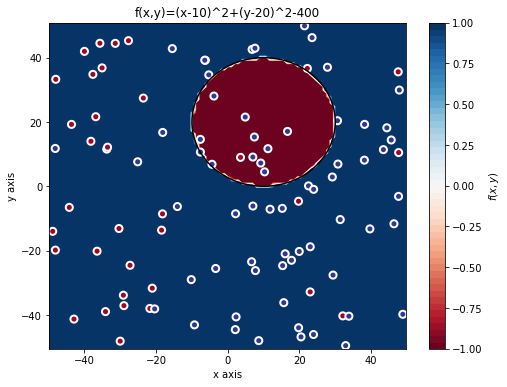

Error de clasificación de la función f(x,y)=0,5(x-10)^2+(y-20)^2-400 :  45.0 %


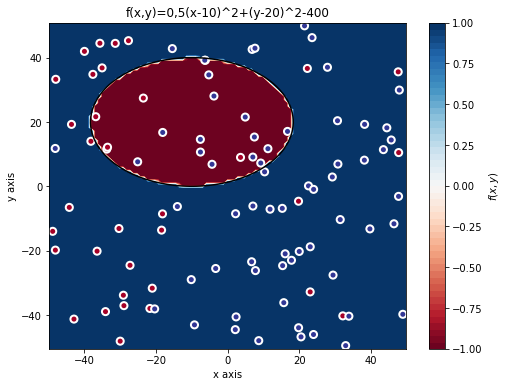

Error de clasificación de la función f(x,y)=0,5(x-10)^2-(y+20)^2-400 :  72.0 %


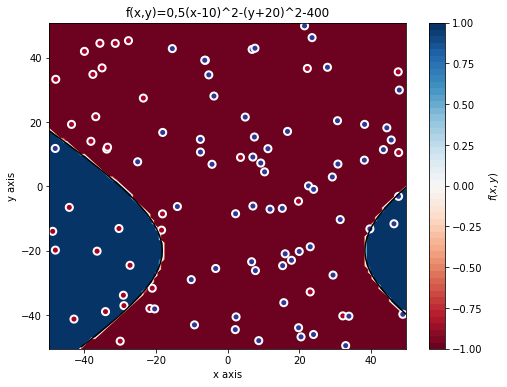

Error de clasificación de la función f(x,y)=y-20x^2-5x+3 :  65.0 %


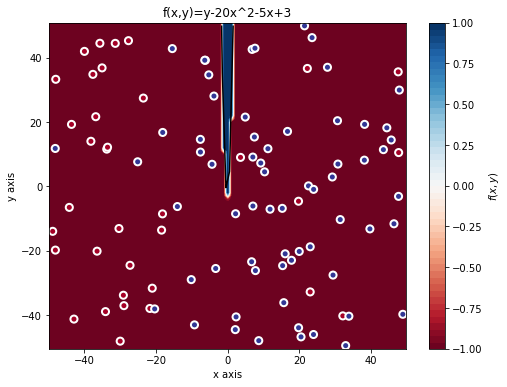

In [ ]:
#CODIGO DEL ESTUDIANTE
# Definimos las 4 funciones
def f1(X):
  x = X[:,0]
  y = X[:,1]
  return (x-10)**2+(y-20)**2-400

def f2(X):
  x = X[:,0]
  y = X[:,1]
  return 0.5*(x+10)**2+(y-20)**2-400

def f3(X):
  x = X[:,0]
  y = X[:,1]
  return 0.5*(x-10)**2-(y+20)**2-400

def f4(X):
  x = X[:,0]
  y = X[:,1]
  return y-20*x**2-5*x+3

# Función que devuelve el error de predicción en tanto por ciento
def error_pred(X,y,f):
  predicciones = f(X)
  errores = 0
  for n in range(y.size):
    if signo(predicciones[n])!=y[n]:
      errores += 1
  return errores/y.size*100

titlef1="f(x,y)=(x-10)^2+(y-20)^2-400"
titlef2="f(x,y)=0,5(x-10)^2+(y-20)^2-400"
titlef3="f(x,y)=0,5(x-10)^2-(y+20)^2-400"
titlef4="f(x,y)=y-20x^2-5x+3"

print("Error de clasificación de la función",titlef1,": ", error_pred(x,y_copia,f1),"%")
plot_datos_cuad(x,y_copia,f1, title=titlef1)

print("Error de clasificación de la función",titlef2,": ", error_pred(x,y_copia,f2),"%")
plot_datos_cuad(x,y_copia,f2, title=titlef2)

print("Error de clasificación de la función",titlef3,": ", error_pred(x,y_copia,f3),"%")
plot_datos_cuad(x,y_copia,f3, title=titlef3)

print("Error de clasificación de la función",titlef4,": ", error_pred(x,y_copia,f4),"%")
plot_datos_cuad(x,y_copia,f4, title=titlef4)

Además de la clasificación visual, he mostrado el tanto por ciento de fallo que tiene cada una de las funciones.\
Como podemos observar, todas ellas tienen un error de clasificación peor que el de la función original. Esto se debe a que este porcentaje que nos daba la recta como clasificadora no provenía de que la recta fuera un mal modelo separador, sino de la presencia de un cierto porcentaje de ruido en la muestra.\
El empeoramiento del error con funciones más complejas nos hace ver claramente que funciones más complejas no necesariamente implican obtener un menor error en la muestra.

Adicionalmente, voy a realizar el mismo experimento realizado con la recta pero con las otras 4 funciones.\
Es decir, para la muestra generada con distribución uniforme en este rango de valores, voy a utilizar cada una de las funciones para clasificar dicha muestra y posteriormente voy a cambiar el 10% de las etiquetas (introducir ruido) y podremos comprobar que, igualmente, el 10% de ruido que introducimos, sigue presente indiferentemente de la complejidad de la función.

In [ ]:
def experimentofunciones(X,f,titlef):
  # Creamos el vector de etiquetas clasificando con f
  y = np.zeros(len(X))
  preds = f(X)
  for n in range(y.size):
    y[n] = signo(preds[n])
  # Introducimos ruido
  y_10ruido = cambia_10percent(y)
  # Mostramos la clasificación y el error
  print("Error de clasificación de la función",titlef1,": ", error_pred(x,y_10ruido,f),"%")
  plot_datos_cuad(x,y_10ruido,f, title=titlef)

Error de clasificación de la función f(x,y)=(x-10)^2+(y-20)^2-400 :  10.0 %


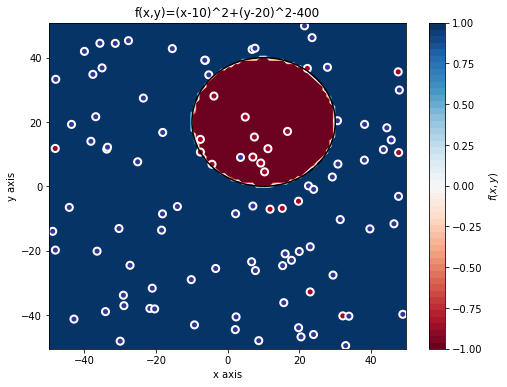


Error de clasificación de la función f(x,y)=(x-10)^2+(y-20)^2-400 :  10.0 %


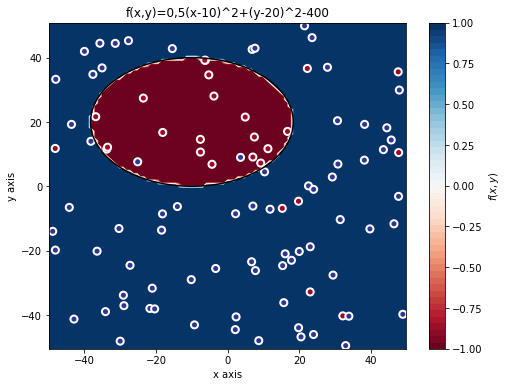


Error de clasificación de la función f(x,y)=(x-10)^2+(y-20)^2-400 :  10.0 %


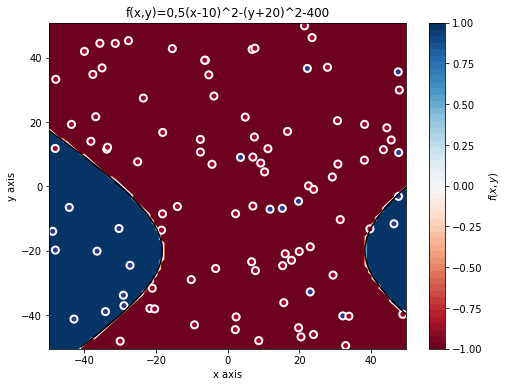


Error de clasificación de la función f(x,y)=(x-10)^2+(y-20)^2-400 :  10.0 %


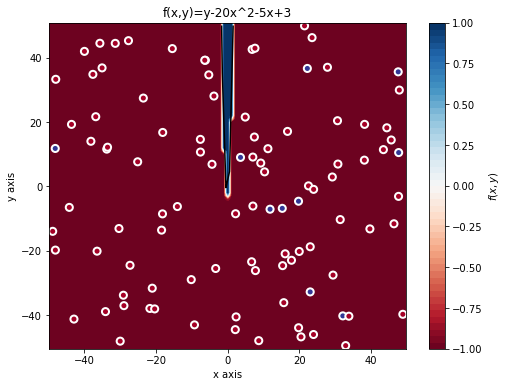

In [ ]:
experimentofunciones(x,f1,titlef1)
print()
experimentofunciones(x,f2,titlef2)
print()
experimentofunciones(x,f3,titlef3)
print()
experimentofunciones(x,f4,titlef4)

Como podemos ver, aunque utilicemos las propias funciones como frontera de clasificación, al introducir ese 10% de ruido siempre se va a ver reflejado en el error de predicción de la función.\
Es por esto que la correcta elección de la clase de funciones utilizada $\cal H$ es un punto clave en el aprendizaje, ya que, el elegir una clase de funciones demasiado compleja tras observar los datos (*data snooping*) puede llevarnos a que la función elegida se encargue también de clasificar el ruido y posteriormente, no sirva para la generalización fuera de la muestra.

# MODELOS LINEALES (7 PUNTOS)

HERRAMIENTAS PREVIAS (Pueden no ejecutarse si se ha ejecutado el ejercicio 1 en su totalidad)

In [ ]:
# EJERCICIO 2.1: ALGORITMO PERCEPTRON
import numpy as np
import matplotlib.pyplot as plt

def simula_unif(N, dim, rango):
	return np.random.uniform(rango[0],rango[1],(N,dim))

def simula_gauss(N, dim, sigma):
    media = 0    
    out = np.zeros((N,dim),np.float64)        
    for i in range(N):
        # Para cada columna dim se emplea un sigma determinado. Es decir, para 
        # la primera columna (eje X) se usará una N(0,sqrt(sigma[0])) 
        # y para la segunda (eje Y) N(0,sqrt(sigma[1]))
        out[i,:] = np.random.normal(loc=media, scale=np.sqrt(sigma), size=dim)
    
    return out

def simula_recta(intervalo):
    points = np.random.uniform(intervalo[0], intervalo[1], size=(2, 2))
    x1 = points[0,0]
    x2 = points[1,0]
    y1 = points[0,1]
    y2 = points[1,1]
    # y = a*x + b
    a = (y2-y1)/(x2-x1) # Calculo de la pendiente.
    b = y1 - a*x1       # Calculo del termino independiente.
    
    return a, b
  # La funcion np.sign(0) da 0, lo que nos puede dar problemas
def signo(x):
	if x >= 0:
		return 1
	return -1

def f(x, y, a, b):
	return signo(y - a*x - b)

## Ejercicio 1: Algoritmo Perceptrón (PLA) (3 puntos)
Implementar la función ajusta_PLA(datos, label, max iter, vini) que calcula el hiperplano solución a un problema de clasificación binaria usando el algoritmo PLA. La entrada datos es una matriz donde cada item con su etiqueta está representado por una fila de la matriz, label el vector de etiquetas (cada etiqueta es un valor +1 o -1), max iter es el número máximo de iteraciones permitidas y vini el valor inicial del vector. La función devuelve los coeficientes del hiperplano.

### Implementación del algoritmo PLA

Tal y como vimos en la teoría, el Perceptrón trata de, para cada punto mal clasificado, mover la frontera de decisión con el objetivo de ajustarlo bien.\
La definición matemática de esto proviene de la definición de una función $error$:\
$error(w^Tx_n,y_n)=\max(0,y_nw^Tx_n)$\
Como podemos ver esta es una función derivable (introduciendo el término $y_n$ en la propia expresión en negativo, nos eliminamos los casos que nos impedían derivar).\
Es por eso que podemos aplicar el descenso del gradiente si queremos conseguir que, para cada punto mal clasificado, la recta se mueva para clasificarlo bien.\
El gradiente de esta función:\
$∇error=\frac{∂\max(0,-y_nw^Tx_n)}{∂w}=-y_nx_n,\ if\ sign(y_n)\ne sign(w^Tx_n)$\
<br>
Por tanto, nuestro algoritmo irá recorriendo la muestra y para cada punto que encuentre mal clasificado aplicará el descenso del gradiente para clasificarlo bien, hasta que realice una época completa (un recorrido de toda la muestra) sin cambiar nada.

In [ ]:
#CODIGO DEL ESTUDIANTE
def ajusta_PLA(datos, label, max_iter, wini):
	it = 0
	w = wini
	changed = True
	while it<max_iter and changed:
		changed = False
		# Para cada punto
		for i in range(label.size):
			# Si está mal clasificado
			if signo(np.dot(w,datos[i]))!=label[i]:
				# aplicamos el descenso del gradiente (suma porque el gradiente es negativo su descenso es positivo)
				w += np.dot(label[i],datos[i])
				changed = True
		it+=1
	return w, it

### Apartado a)
Ejecutar el algoritmo PLA con los datos empleados en el apartado 2a del ejercicio 1. Inicializar el algoritmo con:

In [ ]:
# Establezco la misma semilla que para el apartado 2a)
import numpy as np
np.random.seed(0)
xunif = simula_unif(100, 2, [-50,50])
a, b = simula_recta([-50,50])

yunif = np.zeros(len(xunif))
for i in range(len(xunif)):
  yunif[i] = f(xunif[i,0],xunif[i,1],a,b)

#### Apartado I)
El vector cero

In [ ]:
# Función simple para añadir a la matriz x la columna con x_0=1 al inicio
def insertOnes(x):
  X_new = np.copy(x)

  a = np.ones((len(X_new),1))
  X_new = np.append(X_new, a, axis=1)
  X_new[:,[2,0]] = X_new[:,[0,2]]
  X_new[:,[2,1]] = X_new[:,[1,2]]

  return X_new

# Función que devuelve en tanto por ciento el número de fallos que hace una predicción w
def cuenta_fallos(x,y,w):
  errores = 0
  for i in range(y.size):
    if  signo(np.dot(w,x[i]))!=y[i]:
      errores+=1
  return errores/y.size*100

# Muestra en un gráfico la nube de puntos separada por colores y la clasificación de la recta w
def draw_classification(X,y,w,range=[], title="",xl="",yl=""):
  # set titles
  plt.title(title)
  plt.xlabel(xl)
  plt.ylabel(yl)
  # dibuja los puntos con diferentes colores
  plt.scatter(X[:,1],X[:,2],c=y)
  # dibuja la recta separadora
  rectaX = np.linspace(range[0],range[1],y.size)
  rectaY = (-w[0]-w[1]*rectaX)/w[2]
  plt.plot(rectaX, rectaY)
  if len(range)>0:
    plt.ylim(range)
  plt.show()



El valor de épocas máximas lo he establecido muy grande con el objetivo de que el algoritmo sea capa de converger.\
Realmente, para el caso linealmente separable, lo ideal sería no utilizar número de épocas máximas ya que la teoría nos dice que en tiempo finito, convergerá.\
Sin embargo, afin de reutilizarlo con muestras no linealmente separables, he decidido poner este valor como parámetro.

Épocas necesarias para converger:  116
Errores de clasificación:  0.0 %


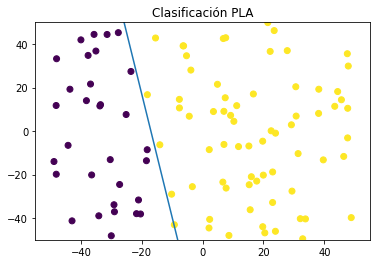

In [ ]:
xonesunif = insertOnes(xunif)
w, it = ajusta_PLA(xonesunif,yunif,1e5,np.zeros(3))
print("Épocas necesarias para converger: ", it)
print("Errores de clasificación: ", cuenta_fallos(xonesunif,yunif,w), "%")
draw_classification(xonesunif,yunif,w,range=[-50,50],title="Clasificación PLA")

# for i in range(y.size):
#   print("(",signo(np.dot(w,xones[i])),", ", y[i],")")

Como podemos ver, dado que la muestra es linealmente separable (ya que la función objetivo es una recta), el algoritmo perceptrón consigue un ajuste perfecto, tal y como vimos en teoría, en tiempo finito.\
Probamos ahora a cambiar el punto de inicio en el Apartado II) para ver cómo afecta

#### Apartado II) 
Con vectores de números aleatorios en [0,1] (10 veces). Anotar el número medio de iteraciones necesarias en ambos para converger. Se deben mostrar en una tabla cada uno de los pesos iniciales empleados, los finales (obtenidos tras el proceso de entrenamiento), y el porcentaje de error de clasificación. 

In [ ]:
#CODIGO DEL ESTUDIANTE
iterations = []
w0s = np.zeros((10,3))
ws = np.zeros((10,3))

# Establezco semilla para que todas las ejecuciones de esta celda den los mismos puntos de inicio
# y concuerden con los de la valoración
np.random.seed(1)
for i in range(0,10):
  wini = np.asarray([np.random.uniform(0,1),np.random.uniform(0,1),np.random.uniform(0,1)])
  w0s[i] = wini
  w, it = ajusta_PLA(xonesunif, yunif, 1e5, wini)
  ws[i] = w
  iterations.append(it)
  
print('Valor medio de épocas necesarias para converger: {}'.format(np.mean(np.asarray(iterations))))

for i in range(len(iterations)):
  print("Pesos iniciales: ", np.around(w0s[i],3), " // Pesos finales: ",np.around(ws[i],3)," //  Épocas necesarias: ", iterations[i])

Valor medio de épocas necesarias para converger: 68.9
Pesos iniciales:  [0.417 0.72  0.   ]  // Pesos finales:  [597.417  33.567   6.128]  //  Épocas necesarias:  81
Pesos iniciales:  [0.302 0.147 0.092]  // Pesos finales:  [593.302  34.361   6.264]  //  Épocas necesarias:  81
Pesos iniciales:  [0.186 0.346 0.397]  // Pesos finales:  [512.186  31.718   4.81 ]  //  Épocas necesarias:  61
Pesos iniciales:  [0.539 0.419 0.685]  // Pesos finales:  [550.539  33.38    3.587]  //  Épocas necesarias:  68
Pesos iniciales:  [0.204 0.878 0.027]  // Pesos finales:  [631.204  38.612   6.185]  //  Épocas necesarias:  84
Pesos iniciales:  [0.67  0.417 0.559]  // Pesos finales:  [387.67   20.577   3.42 ]  //  Épocas necesarias:  42
Pesos iniciales:  [0.14  0.198 0.801]  // Pesos finales:  [547.14   30.477   5.3  ]  //  Épocas necesarias:  68
Pesos iniciales:  [0.968 0.313 0.692]  // Pesos finales:  [362.968  21.617   2.001]  //  Épocas necesarias:  38
Pesos iniciales:  [0.876 0.895 0.085]  // Pesos fi

#### Valoración
Valorar el resultado relacionando el punto de inicio con el número de iteraciones.

Como podemos observar, en un rango muy pequeño de puntos de inicio: $[0,1]×[0,1]$, la variabilidad de la cántidad de **épocas** necesarias para converger sobre esta muestra puede llegar desde 38 a 98. Esta diferencia de 60 épocas puede no parecer mucho, pero sin embargo, si hablamos en términos de iteraciones, cada época significan $N$ iteraciones, por lo que, para esta muestra, obtendríamos una diferencia de 6000 iteraciones según si empezáramos en dos puntos diferentes en un rango muy pequeño.

### Apartado b)
Hacer lo mismo usando los datos del apartado 2b del ejercicio 1.

In [ ]:
# De nuevo, ponemos la misma semilla para obtener los mismos datos
# Establezco la misma semilla que para el apartado 2a)
np.random.seed(0)
xunif = simula_unif(100, 2, [-50,50])
a, b = simula_recta([-50,50])
xonesunif = insertOnes(xunif)

yunif = np.zeros(len(xunif))
for i in range(len(xunif)):
  yunif[i] = f(xunif[i,0],xunif[i,1],a,b)
# Y ahora, hago lo mismo que para el apartado 2b) cambiando el 10%
# Cambiamos el 10% de cada clase
y_copia = cambia_10percent(yunif)

#### Apartado I)
Inicializando vini con el vector 0

Errores de clasificación:  17.0
Iteraciones realizadas:  1000


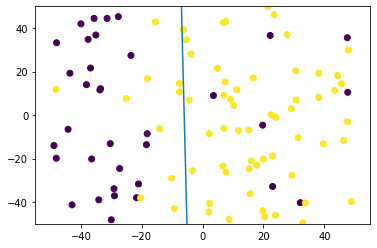

In [ ]:
# Ahora, ajusto a la muestra NO LINEALMENTE SEPARABLE
w, it = ajusta_PLA(xonesunif, y_copia,1e3,np.zeros(3))
print("Errores de clasificación: ", cuenta_fallos(xonesunif, y_copia, w))
print("Iteraciones realizadas: ", it)
draw_classification(xonesunif,y_copia,w, range=[-50,50],title="Clasificación PLA con ruido")

#### Apartado II
Inicializando vini con vectores de números aleatorios en [0,1] (10 veces). Anotar el número medio de iteraciones necesarias en ambos para converger. Se deben mostrar en una tabla cada uno de los pesos iniciales empleados, los finales (obtenidos tras el proceso de entrenamiento), y el porcentaje de error de clasificación. 

In [ ]:
#CODIGO DEL ESTUDIANTE
np.random.seed(0)
# Random initializations
errors = []
iterations = []
# NO ME DEJA USAR ARRAY DE PYTHON PORQUE CAMBIA LOS NÚMEROS
w0s = np.zeros((10,3))
ws = np.zeros((10,3))

np.random.seed(1)
for i in range(0,10):
  wini = np.asarray([np.random.uniform(0,1),np.random.uniform(0,1),np.random.uniform(0,1)])
  w0s[i] = wini
  w, it = ajusta_PLA(xonesunif, y_copia, 1e3, wini)
  ws[i] = w
  errors.append(cuenta_fallos(xonesunif,y_copia,w))
  iterations.append(it)
  
print('Valor medio de épocas empleadas: {}'.format(np.mean(np.asarray(iterations))))
print('Error medio: {}'.format(np.mean(np.asarray(errors))))

for i in range(len(iterations)):
  print("Pesos iniciales: ", np.around(w0s[i],3), " // Pesos finales: ", np.around(ws[i],3) ," // Porcentaje de error: ", errors[i])

Valor medio de épocas empleadas: 1000.0
Error medio: 19.4
Pesos iniciales:  [0.417 0.72  0.   ]  // Pesos finales:  [319.417  47.067 -16.759]  // Porcentaje de error:  22.0
Pesos iniciales:  [0.302 0.147 0.092]  // Pesos finales:  [314.302  52.676   1.605]  // Porcentaje de error:  17.0
Pesos iniciales:  [0.186 0.346 0.397]  // Pesos finales:  [289.186  28.36   -2.518]  // Porcentaje de error:  13.0
Pesos iniciales:  [0.539 0.419 0.685]  // Pesos finales:  [ 3.06539e+02  5.88030e+01 -1.38000e-01]  // Porcentaje de error:  20.0
Pesos iniciales:  [0.204 0.878 0.027]  // Pesos finales:  [326.204  45.157   1.82 ]  // Porcentaje de error:  15.0
Pesos iniciales:  [0.67  0.417 0.559]  // Pesos finales:  [337.67   58.312   1.205]  // Porcentaje de error:  17.0
Pesos iniciales:  [0.14  0.198 0.801]  // Pesos finales:  [308.14   49.057   2.34 ]  // Porcentaje de error:  17.0
Pesos iniciales:  [0.968 0.313 0.692]  // Pesos finales:  [319.968  36.785 -18.932]  // Porcentaje de error:  23.0
Pesos i

Como podemos ver, en este caso, la influencia del punto de inicio se muestra en el porcentaje de error conseguido, haciendo que este llegue desde 13% en algunos casos hasta un 28% en otros.

#### Valoración
¿Observa algún comportamiento diferente? En caso afirmativo diga cuál y las razones para que ello ocurra.

Como podemos observar, ahora, el algoritmo perceptrón no es capaz de separar la muestra ya que no es linealmente separable. Esto supone por tanto, que parar en la última época (la época que indiquemos con max_iter) <u>no suponga un mejor error</u>.\
Esto se puede ver fácilmente con el siguiente experimento:

In [ ]:
def PLA_errores(datos,label,max_iter,wini):
  it = 0
  w = wini
  changed=True
  errores=[]
  while it<max_iter and changed:
    changed=False
    for i in range(label.size):
      if signo(np.dot(w,datos[i]))!=label[i]:
        w+=np.dot(label[i],datos[i])
        changed=True
    errores.append(cuenta_fallos(datos,label,w))
    it+=1
  return w,it,errores

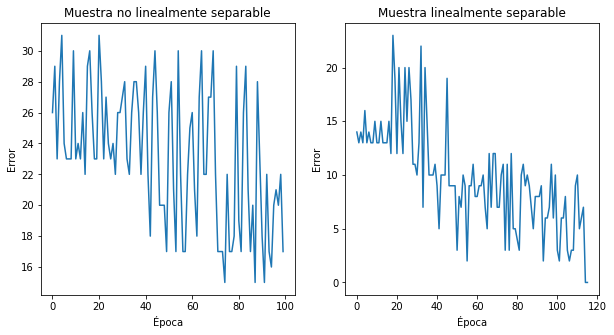

In [ ]:
w, it, errores = PLA_errores(xonesunif, y_copia, 1e2, np.zeros(3))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax.set_title("Muestra no linealmente separable")
ax.set_xlabel("Época")
ax.set_ylabel("Error")
ax.plot(np.arange(0,len(errores)),errores)

w,it,errores = PLA_errores(xonesunif,yunif,1e3,np.zeros(3))
ax = fig.add_subplot(1,2,2)
ax.set_title("Muestra linealmente separable")
ax.set_xlabel("Época")
ax.set_ylabel("Error")
ax.plot(np.arange(0,len(errores)),errores)

Como podemos ver en las gráficas la cosa cambia mucho cuando se trata de una muestra no separable. En el caso de la muestra separable, estaba claro que, dado que el algoritmo conseguía converger nos debíamos quedar con el último valor que consiguiera separar toda la muestra y que nos daba error 0.\
Sin embargo, ahora en el caso no linealmente separable se puede observar en la gráfica que, el valor de error en la última época es bastante peor que en algunas otras épocas (por ejemplo en el mínimo que hemos encontrado un poco antes de la época 100).\
Como solución a este problema surge la idea del PLA-Pocket, un algoritmo que guarda la mejor solución encontrada hasta el momento por lo que evitaríamos este problema que hemos analizado.


In [ ]:
# PLA-Pocket
def PLA_Pocket_errores(X, y, w_0, max_iter):
  errores = []
  it = 0
  w = wini
  better_error = cuenta_fallos(X,y,w)
  better_w = w
  while it<max_iter:
    changed = False
    for i in range(y.size):
      if signo(np.dot(w,X[i]))!=y[i]:
        w += np.dot(X[i],y[i])
    it+=1
    erroractual = cuenta_fallos(X,y,w)
    if erroractual<better_error:
      better_error = erroractual
      better_w = w
    errores.append(better_error)
  return w, it, errores

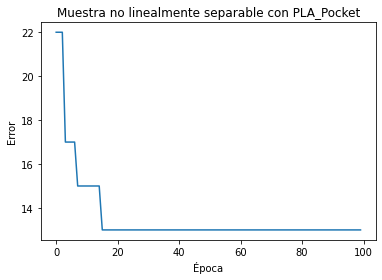

In [ ]:
w,it,errores = PLA_Pocket_errores(xonesunif,y_copia,np.zeros(30),1e2)


fig = plt.figure()
ax = fig.add_subplot()
ax.set_title("Muestra no linealmente separable con PLA_Pocket")
ax.set_xlabel("Época")
ax.set_ylabel("Error")
ax.plot(np.arange(0,len(errores)),errores)

Como podemos ver, el error obtenido con el algoritmo PLA-Pocket siempre va a ser mejor (o al menos igual) que el obtenido con PLA normal, ya que nos almacenamos siempre el mejor obtenido en cada época.\
Bien es cierto que no todo es bueno para este algoritmo, ya que obviamente la evaluación de la función de error en cada época supone un coste que no es para nada despreciable según aumenta la muestra.

## Ejercicio 2: Regresión Logística (RL) (4 puntos)
En este ejercicio emplearemos nuestra propia función objetivo $f$ y un conjunto de datos $\cal D$ para ver cómo funciona regresión logística. Consideraremos $d=2$ para que los datos sean fácilmente visualizables, y emplearemos ${\cal X}=[0,2]\times[0,2]$ con probabilidad uniforme de elegir cada $x\in\cal X$. Elegir una línea en el plano que pase por $\cal X$ como la frontera que separa la región en donde $y$ toma valores +1 y -1. Para ello, seleccionar dos puntos aleatorios de $\cal X$ y calcular la línea que pasa por ambos.\
Impleméntese RL con Gradiente Descendente Estocástico (SGD) del siguiente modo:
* Inicializar el vector de pesos con valores $0$
* Parar el algoritmo cuando $||w^{t+1}-w^t||<0,01$, donde $w(t)$ denota el vector de pesos al final de la época $t$. Recuérdese que una época es un pase completo a través de los $N$ ejemplos de nuestro conjunto de datos.
* Aplicar una permutación aleatorios de $\{1,2,...,N\}$ a los índices de los datos, antes de usalos en cada época del algoritmo.

A continuación, empleando la implementación anterior, realícese el siguiente experimento.

### Punto 1
Seleccione $N=100$ puntos aleatorios ${x_n}$ de $\cal X$ y evalúe las respuestas $\{y_n\}$ de todos ellos respecto de la frontera elegida

HERRAMIENTAS PREVIAS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simula_unif(N, dim, rango):
	return np.random.uniform(rango[0],rango[1],(N,dim))
 
def simula_recta(intervalo):
    points = np.random.uniform(intervalo[0], intervalo[1], size=(2, 2))
    x1 = points[0,0]
    x2 = points[1,0]
    y1 = points[0,1]
    y2 = points[1,1]
    # y = a*x + b
    a = (y2-y1)/(x2-x1) # Calculo de la pendiente.
    b = y1 - a*x1       # Calculo del termino independiente.
    return a, b

def signo(x):
	if x >= 0:
		return 1
	return -1

def draw_classification(X,y,w, title="",xl="",yl=""):
  # set titles
  plt.title(title)
  plt.xlabel(xl)
  plt.ylabel(yl)
  # dibuja los puntos con diferentes colores
  plt.scatter(X[:,1],X[:,2],c=y)
  # dibuja la recta separadora
  rectaX = np.linspace(np.min(X[:,1]),np.max(X[:,1]),y.size)
  rectaY = (-w[0]-w[1]*rectaX)/w[2]
  plt.plot(rectaX, rectaY)
  plt.ylim((min(X[:,2]),max(X[:,2])))

def insertOnes(x):
  X_new = np.copy(x)

  a = np.ones((len(X_new),1))
  X_new = np.append(X_new, a, axis=1)
  X_new[:,[2,0]] = X_new[:,[0,2]]
  X_new[:,[2,1]] = X_new[:,[1,2]]

  return X_new
  
def f(x, y, a, b):
	return signo(y - a*x - b)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


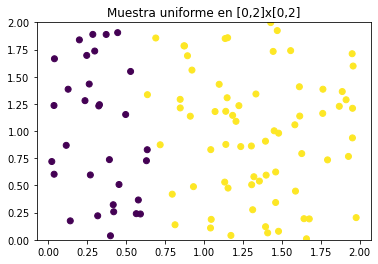

In [ ]:
np.random.seed(0)
intervalo = [0,2]
N = 100
# Seleccionamos 100 puntos aleatorios en [0,2]x[0,2]
D = simula_unif(N, 2, intervalo)
# Generamos la recta en [0,2] para clasificar
a,b = simula_recta(intervalo)
# Clasificamos en función de la recta
y = np.zeros(N)
for i in range(N):
  y[i] = f(D[i,0],D[i,1],a,b)

# Creamos ya la matriz con x_0=1
Dones = insertOnes(D)
draw_classification(Dones, y, np.zeros(3),range=[0,2],title="Muestra uniforme en [0,2]x[0,2]")

### Punto 2
Ejecute RL para encontrar la función solución $g$, y evalúe el error $E_{out}$ usando para ello una nueva muestra de datos ($>999$). Se debe escoger experimentalmente tanto el learning rate ($\eta$) como el tamaño del batch.

Procedemos a implementar ahora el algoritmo de Regresión Logística en su versión estocástica.\
Como sabemos, el modelo de regresión logística es un modelo lineal en los parámetros, es decir, un modelo cuyos parámetros son un conjunto de pesos que se utilizan para obtener una solución $s$ de la siguiente forma:\
$s = \sum_{i=0}^d w_ix_i$\
al igual que todos los modelos lineales vistos anteriormente.\
Sin embargo, la diferencia con el resto de modelos es la función que se aplica a esa $s$, la cual para este caso será la función sigmoide $\large σ(s)=\frac{1}{1+e^{-s}}$, que nos dará una salida acotada entre $0$ y $1$, y que será interpretada en términos probabilísticos.\
Como clasificador se define de la siguiente forma: si la función sigmoide toma valores mayores o iguales que $0.5$, se considereará que la etiqueta asociada será $+1$; en el caso contrario, la etiqueta será $-1$.\

In [ ]:
# IMPLEMENTACION SGDRL
# Definición de la función de error (entropía cruzada)
def CrossEntropy(X, y, w):
  err = 0.0
  for n in range(y.size):
    err += np.log(1+np.exp(-y[n]*np.dot(w,X[n])))
  return err/y.size

def gradCrossEntropy(xn, yn, w):
  return (yn*xn)/(1+np.exp(yn*np.dot(w,xn)))

def sigmoid(x):
  return 1/(1+np.exp(-x))

def cuenta_erroresRL(X,y,w):
  errores = 0
  for n in range(y.size):
    sigmoide = sigmoid(w.dot(X[n]))
    if ((sigmoide<0.5)and(y[n]==1))or((sigmoide>0.5)and (y[n]==-1)):
      errores+=1
  return errores/y.size

# Definición del descenso estocástico
def sgdRL(X, y, w0, eta, batch_size):
  primera = True
  actual = w0
  anterior = actual
  diferencia = anterior-actual
  it = 0
  indices = np.arange(0,y.size,1)
  num_batches = y.size//batch_size+1
  diferenciamodulo = 0.02
  # Cada iteración del while es una epoca
  while diferenciamodulo >= 0.01:
    # nos guardamos w(t-1)
    anterior = actual
    # Barajamos los índices
    np.random.shuffle(indices)
    # para cada batch
    for i in range(num_batches):
      # Extraemos los índices
      minibatch = indices[i*batch_size:(i+1)*batch_size]      
      suma = np.zeros(actual.size)
      for n in minibatch:
        suma += gradCrossEntropy(X[n],y[n],actual)  
      # Una vez hecha la suma en un minibatch, calculamos el gradiente y actualizamos w(t)
      actual = actual + eta*suma/batch_size
    # Actualizamos la diferencia w(t-1)-w(t)
    diferencia = anterior-actual
    it += 1
    diferenciamodulo = np.sqrt(diferencia.dot(diferencia))
  return actual, it

Estudio lr

Analizamos varios valores posibles de learning rate para asegurarnos de que nos quedamos con el mejor

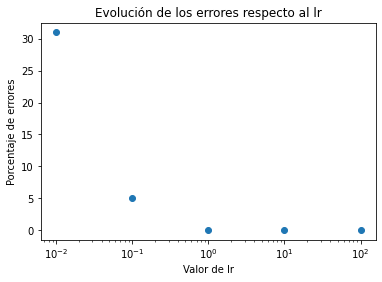

In [ ]:
npruebas = 5
lr = 1e-2
errores = np.zeros(npruebas)
xs = np.zeros(npruebas)

for i in range(npruebas):
  w, it = sgdRL(Dones, y, np.zeros(3), lr, 32)
  errores[i] = cuenta_erroresRL(Dones, y, w)*100
  xs[i] = lr
  lr *= 10

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(xs, errores)
ax.set_title("Evolución de los errores respecto al lr")
ax.set_xlabel("Valor de lr")
ax.set_ylabel("Porcentaje de errores")
ax.set_xscale("log")

En la realidad, la elección de un learning rate por encima de 1 (o incluso de 0,1) suele ser un disparate, sin embargo en este caso, hemos visto empíricamente que el mejor caso es un learning rate de 10 e incluso de 100.

Estudio batch_size

De igual modo, analizamos el impacto de diferentes batch_size, aunque, habiendo obtenido ya un error de 0 para un batch_size arbitrario, podemos esperar que no influya demasiado

Text(0, 0.5, 'Porcentaje de errores')

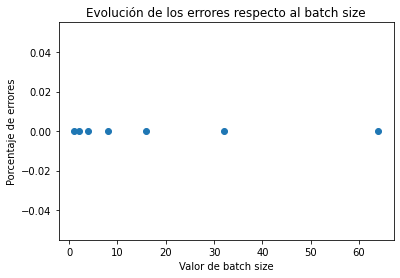

In [ ]:
npruebas = 7
errores = np.zeros(npruebas)
xs = np.zeros(npruebas)

for i in range(npruebas):
  w, it = sgdRL(Dones, y, np.zeros(3), 10, 2**i)
  errores[i] = cuenta_erroresRL(Dones, y, w)*100
  xs[i] = 2**i

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(xs, errores)
ax.set_title("Evolución de los errores respecto al batch size")
ax.set_xlabel("Valor de batch size")
ax.set_ylabel("Porcentaje de errores")

Tal y como hemos visto, desde $2^0$ hasta $2^6$, el valor de error conseguido es el mismo, por lo que realmente, el batch_size no influye.

Ejecutamos ahora el experimento con los valores escogidos de learning rate y batch_size

Porcentaje de erorres dentro de la muestra:  0.0 %


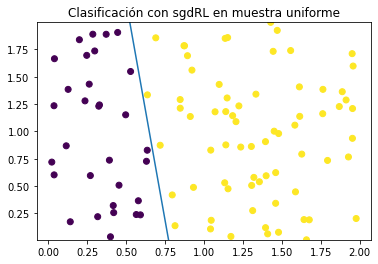

In [ ]:
# Seleccionamos 100 puntos aleatorios en [0,2]x[0,2]
np.random.seed(0)
D = simula_unif(N, 2, intervalo)
# Generamos la recta en [0,2] para clasificar
a,b = simula_recta(intervalo)
# Clasificamos en función de la recta
y = np.zeros(N)
for i in range(N):
  y[i] = f(D[i,0],D[i,1],a,b)
# Creamos ya la matriz con x_0=1
Dones = insertOnes(D)
w,it = sgdRL(Dones, y, np.zeros(3),10,16)

print("Porcentaje de erorres dentro de la muestra: ", cuenta_fallos(Dones,y,w)*100,"%")
draw_classification(Dones,y,w,title="Clasificación con sgdRL en muestra uniforme")

Porcentaje de errores fuera de la muestra:  0.8999999999999999 %


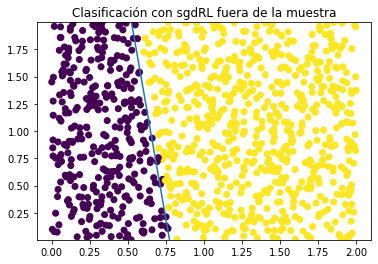

In [ ]:
# Generamos el conjunto fuera de lamuestra
out = simula_unif(1000, 2, [0,2])
out = insertOnes(out)
# Generamos las etiquetas correctas del conjunto fuera dela muestra
yout = np.zeros(1000)
for i in range(1000):
  yout[i] = f(out[i,1],out[i,2],a,b)
# Vemos cómo clasifica
print("Porcentaje de errores fuera de la muestra: ", cuenta_erroresRL(out,yout,w)*100,"%")
draw_classification(out, yout,w,title="Clasificación con sgdRL fuera de la muestra")

Como vemos, Regresión Logística encuentra también un clasificador que consigue un error 0 en la muestra linealmente separable. Sin embargo, el conseguir un error 0 en una muestra limitada, no nos asegura conseguir un error 0 fuera de la muestra, tal y como vimos en teoría.

### Punto 3
Repita el experimento $100$ veces, y calcule los valores promedio de $E_{out}$, de porcentaje de error de clasificación, y de épocas necesarias para converger.

In [ ]:
def experimento(N, intervalo):
  # Seleccionamos 100 puntos aleatorios en [0,2]x[0,2]
  D = simula_unif(N, 2, intervalo)
  # Generamos la recta en [0,2] para clasificar
  a,b = simula_recta(intervalo)
  # Clasificamos en función de la recta
  y = np.zeros(N)
  for i in range(N):
    y[i] = f(D[i,0],D[i,1],a,b)
  # Creamos ya la matriz con x_0=1
  Dones = insertOnes(D)
  w,it = sgdRL(Dones, y, np.zeros(3),10,16)
  # Generamos ahora el conjunto uera de la muestra
  out = simula_unif(1000, 2, intervalo)
  out = insertOnes(out)
  # Generamos las etiquetas correctas del conjunto fuera dela muestra
  yout = np.zeros(1000)
  for i in range(1000):
    yout[i] = f(out[i,1],out[i,2],a,b)
  
  # Devolvemos cuánto acierta la función aprendida dentro de la muestra
  # en el conjunto fuera de la muestra
  return CrossEntropy(out, yout,w), cuenta_erroresRL(out,yout,w), it

intervalo = [0,2]
N = 100
veces = 100
errores = []
iterations = []
eouts = []
np.random.seed(0)
for i in range(veces):
  entropy, err, it = experimento(N, intervalo)
  errores.append(err)
  iterations.append(it)
  eouts.append(entropy)


In [ ]:
print("Eout medio: ", np.average(eouts))
print("Error de clasificación medio: ", np.average(errores)*100,"%")
print("Iteraciones medias: ", np.average(iterations))

Eout medio:  0.025798350125395123
Error de clasificación medio:  1.0 %
Iteraciones medias:  3343.72


Como vemos, ocurre algo similar al experimento individual, no conseguimos tener un ajuste perfecto fuera de la muestra ya que tenemos algo de error medio fuera de esta.\
A pesar de esto, como realmente los puntos de la muestra estaban clasificados con la función objetivo y sin ruido, el ajuste es muy bueno y consigue también un buen porcentaje de error fuera de la muestra.\
El haber introducido ruido en la muestra, podría haber conseguido que el algoritmo tratara de ajustar también el ruido y por tanto, podría haber empeorado enormemente el error fuera de la muestra.

# BONUS (1.5 PUNTOS)

**Clasificación de dígitos**. Considerar el conjunto de datos de dígitos manuscritos, y seleccionar las muestras de los dígitos 4 y 8. Extraer las características de intensidad promedio y simetría en la manera que se indicó en el ejercicio 3 de la práctica anterior.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Funcion para leer los datos
def readData(file_x, file_y, digits, labels):
	# Leemos los ficheros	
	datax = np.load(file_x)
	datay = np.load(file_y)
	y = []
	x = []	
	# Solo guardamos los datos cuya clase sea la digits[0] o la digits[1]
	for i in range(0,datay.size):
		if datay[i] == digits[0] or datay[i] == digits[1]:
			if datay[i] == digits[0]:
				y.append(labels[0])
			else:
				y.append(labels[1])
			x.append(np.array([1, datax[i][0], datax[i][1]]))
			
	x = np.array(x, np.float64)
	y = np.array(y, np.float64)
	
	return x, y

def muestra_datos(x,y, x_test, y_test):
  #mostramos los datos
  fig, ax = plt.subplots()
  ax.plot(np.squeeze(x[np.where(y == -1),1]), np.squeeze(x[np.where(y == -1),2]), 'o', color='red', label='4')
  ax.plot(np.squeeze(x[np.where(y == 1),1]), np.squeeze(x[np.where(y == 1),2]), 'o', color='blue', label='8')
  ax.set(xlabel='Intensidad promedio', ylabel='Simetria', title='Digitos Manuscritos (TRAINING)')
  ax.set_xlim((0, 1))
  plt.legend()
  plt.show()

  fig, ax = plt.subplots()
  ax.plot(np.squeeze(x_test[np.where(y_test == -1),1]), np.squeeze(x_test[np.where(y_test == -1),2]), 'o', color='red', label='4')
  ax.plot(np.squeeze(x_test[np.where(y_test == 1),1]), np.squeeze(x_test[np.where(y_test == 1),2]), 'o', color='blue', label='8')
  ax.set(xlabel='Intensidad promedio', ylabel='Simetria', title='Digitos Manuscritos (TEST)')
  ax.set_xlim((0, 1))
  plt.legend()
  plt.show()

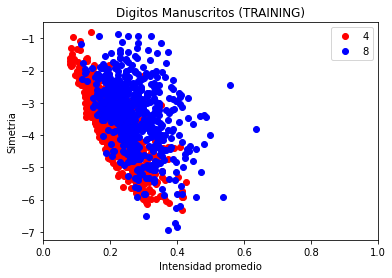

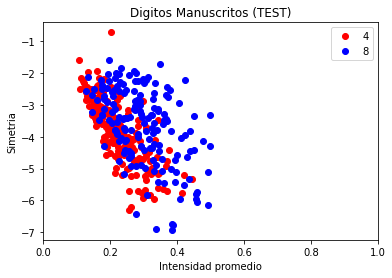

In [ ]:
# Lectura de los datos de entrenamiento
x, y = readData('/content/drive/MyDrive/datos/X_train.npy', '/content/drive/MyDrive/datos/y_train.npy', [4,8], [-1,1])
# Lectura de los datos para el test
x_test, y_test = readData('/content/drive/MyDrive/datos/X_test.npy', '/content/drive/MyDrive/datos/y_test.npy', [4,8], [-1,1])

muestra_datos(x,y,x_test,y_test)

## Apartado 1
Plantear un problema de clasificación binaria que considere el conjunto de entrenamiento como datos de entrada para aprender la función $g$

El problema tendrá los siguientes elementos:\
$\cal X$: Conjunto de todos las muestras y sus características de dígitos manuscritos, es decir, conjunto de vectores $(x_0,x_1,x_2)$\
$\cal Y$: $\{-1,+1\}$, según si pertenecen a la clase del 4 o del 8

## Apartado 2
Compárense los modelos de regresión lineal, PLA, RL, y PLA-Pocket



a) Generar gráficos separados de los datos de entrenamiento y test junto con la función estimada\
b) Calcular $E_{in}$ y $E_{test}$

In [ ]:
def cuenta_errores(X,y,w):
  err = 0
  for n in range(y.size):
    if signo(w.dot(X[n]))!=y[n]:
      err += 1
  return err/y.size

def draw_classification(X,y,w, title="",xl="",yl=""):
  # set titles
  plt.title(title)
  plt.xlabel(xl)
  plt.ylabel(yl)
  # dibuja los puntos con diferentes colores
  plt.plot(np.squeeze(x[np.where(y == -1),1]), np.squeeze(x[np.where(y == -1),2]), 'o', color='red', label='4')
  plt.plot(np.squeeze(x[np.where(y == 1),1]), np.squeeze(x[np.where(y == 1),2]), 'o', color='blue', label='8')
  plt.legend()
  # dibuja la recta separadora
  rectaX = np.linspace(np.min(X[:,1]),np.max(X[:,1]),y.size)
  rectaY = (-w[0]-w[1]*rectaX)/w[2]
  plt.plot(rectaX, rectaY,color='black')
  plt.ylim((min(X[:,2]),max(X[:,2])))

  plt.show()

def signo(x):
	if x >= 0:
		return 1
	return -1

### Regresión Lineal (Pseudo-Inversa)

Para regresión lineal utilizaremos la pseudoinversa que nos da numpy

Errores en training:  22.780569514237854 %


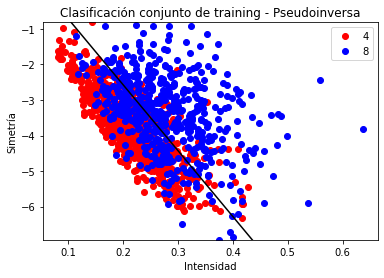

Errores en test:  25.136612021857925 %


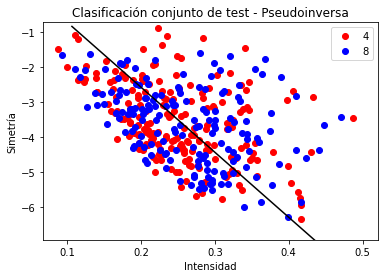

In [ ]:
w = np.linalg.pinv(x).dot(y)

print("Errores en training: ", cuenta_errores(x,y,w)*100,"%")
draw_classification(x,y,w,title="Clasificación conjunto de training - Pseudoinversa",xl="Intensidad", yl="Simetría")

print("Errores en test: ", cuenta_errores(x_test,y_test,w)*100,"%")
draw_classification(x_test,y_test,w,title="Clasificación conjunto de test - Pseudoinversa",xl="Intensidad", yl="Simetría")

### PLA

In [ ]:
# PLA (Tal cual en el ejercicio anterior)
def PLA(X, y,w_0, max_iter=1e3):
	it = 0
	w = w_0
	changed = True
	while it<max_iter and changed:
		changed = False
		for i in range(y.size):
			if signo(np.dot(w,X[i]))!=y[i]:
				w += np.dot(X[i],y[i])
				changed = True
		it+=1
	return w, it

Errores en training:  30.90452261306533 %


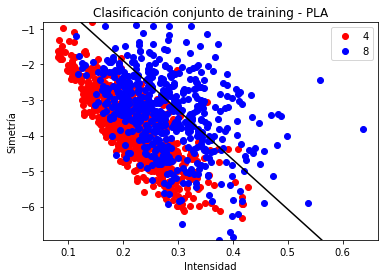

Errores en test:  30.05464480874317 %


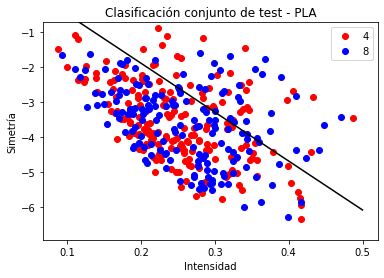

In [ ]:
w,it = PLA(x,y,np.zeros(3))

print("Errores en training: ", cuenta_errores(x,y,w)*100,"%")
draw_classification(x,y,w,title="Clasificación conjunto de training - PLA",xl="Intensidad", yl="Simetría")

print("Errores en test: ", cuenta_errores(x_test,y_test,w)*100,"%")
draw_classification(x_test,y_test,w,title="Clasificación conjunto de test - PLA",xl="Intensidad", yl="Simetría")

### Regresión Logística

In [ ]:
# RL
def sigmoid(x):
  return 1/(1+np.exp(-x))

def cuenta_erroresRL(X,y,w):
  errores = 0
  for n in range(y.size):
    sigmoide = sigmoid(w.dot(X[n]))
    if ((sigmoide<0.5)and(y[n]==1))or((sigmoide>0.5)and (y[n]==-1)):
      errores+=1
  return errores/y.size
  
def gradCrossEntropy(xn, yn, w):
  return (yn*xn)/(1+np.exp(yn*np.dot(w,xn)))

# Definición del descenso estocástico
def sgdRL(X, y, w0, lr, batch_size):
  primera = True
  actual = w0
  anterior = actual
  diferencia = anterior-actual
  it = 0
  indices = np.arange(0,y.size,1)
  num_batches = y.size//batch_size+1
  diferenciamodulo = 0.0
  # Cada iteración del while es una epoca
  while (primera) or (diferenciamodulo >= 0.01):
    primera = False
    # nos wardamos w(t-1)
    anterior = actual
    # Barajamos los índices
    np.random.shuffle(indices)
    # para cada batch
    for i in range(num_batches):
      # Extraemos los índices
      minibatch = indices[i*batch_size:(i+1)*batch_size]      
      suma = np.zeros(actual.size)
      for n in minibatch:
        suma += gradCrossEntropy(X[n],y[n],actual)   
      actual = actual + lr*suma/y.size
    # Actualizamos la diferencia w(t-1)-w(t)
    diferencia = anterior-actual
    it += 1
    diferenciamodulo = np.sqrt(diferencia.dot(diferencia))
  return actual, it

Breve elección del lr para sgdRL

In [ ]:
lr = 1e-3
for i in range(5):
  w, it = sgdRL(x,y,np.zeros(3),lr,32)
  print(lr,": ",cuenta_errores(x,y,w)*100, " // it: ", it)
  lr *= 10

0.001 :  45.39363484087102  // it:  1
0.01 :  45.39363484087102  // it:  1
0.1 :  45.39363484087102  // it:  4
1.0 :  23.19932998324958  // it:  647
10.0 :  22.445561139028474  // it:  607


Aunque hay cierta aleatoriedad, en general, valores por debajo de 1 caen en mínimos locales tras muy pocas iteraciones. El 10 nos da un buen error y una cantidad de épocas menor que el 1

Breve eleccion del batc_size para sgdRL

In [ ]:
for i in range(1,8):
  bs = 2**i
  w,it = sgdRL(x,y,np.zeros(3),10,bs)
  print(bs, ": ", cuenta_errores(x,y,w)*100, " // it: ", it)

2 :  22.194304857621443  // it:  659
4 :  22.445561139028474  // it:  663
8 :  22.194304857621443  // it:  645
16 :  22.36180904522613  // it:  615
32 :  21.608040201005025  // it:  653
64 :  22.613065326633166  // it:  585
128 :  22.445561139028474  // it:  753


El batch_size no es apenas influyente ya que los valores dependen de la aleatoriedad del barajeo de los índices. Cogemos el 4 por ejemplo

Épocas:  577
Errores en training:  21.608040201005025 %


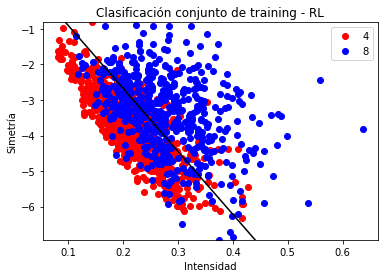

Errores en test:  24.316939890710383 %


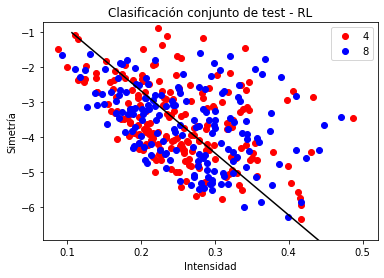

In [ ]:
w,it = sgdRL(x,y,np.zeros(3),10,4)
print("Épocas: ", it)

print("Errores en training: ", cuenta_erroresRL(x,y,w)*100,"%")
draw_classification(x,y,w,title="Clasificación conjunto de training - RL",xl="Intensidad", yl="Simetría")

print("Errores en test: ", cuenta_erroresRL(x_test,y_test,w)*100,"%")
draw_classification(x_test,y_test,w,title="Clasificación conjunto de test - RL",xl="Intensidad", yl="Simetría")

### PLA-Pocket

In [ ]:
# PLA-Pocket
def PLA_Pocket(X, y, w_0,max_iter=1e2):
  it = 0
  w = w_0
  better_error = cuenta_errores(X,y,w)
  better_w = w
  while it<max_iter:
    changed = False
    for i in range(y.size):
      if signo(np.dot(w,X[i]))!=y[i]:
        w += np.dot(X[i],y[i])
    it+=1
    erroractual = cuenta_errores(X,y,w)
    if erroractual<better_error:
      better_error = erroractual
      better_w = w
  return w, it

Errores en training:  23.19932998324958 %


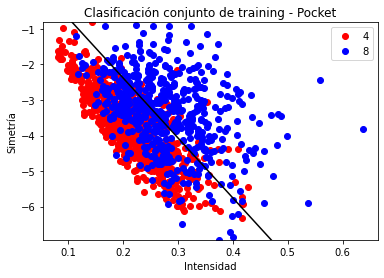

Errores en test:  24.863387978142075 %


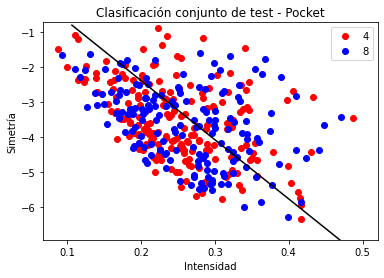

In [ ]:
w,it = PLA_Pocket(x,y,np.zeros(3))

print("Errores en training: ", cuenta_erroresRL(x,y,w)*100,"%")
draw_classification(x,y,w,title="Clasificación conjunto de training - Pocket",xl="Intensidad", yl="Simetría")

print("Errores en test: ", cuenta_erroresRL(x_test,y_test,w)*100,"%")
draw_classification(x_test,y_test,w,title="Clasificación conjunto de test - Pocket",xl="Intensidad", yl="Simetría")

Se muestra una tabla de resultados:

| Algoritmo      | Ein    | Etest  |
| -------------- | ------ | ------ |
| Pseudo-Inversa | 22,78% | 25,14% |
| PLA            | 30,9%  | 25.96% |
| RL             | 22.19% | 24,59% |
| PLA-Pocket     | 23,2%  | 24,86% |

En ella podemos observar algunas cosas obvias, como por ejemplo, que PLA-Pocket, en muestras no linealmente separables, siempre va a conseguir un valor al menos tan bueno como PLA ya que se almacena el mejor de PLA.\
Además, vemos también que aunque la PseudoInversa se definiera como la matriz de pesos que minimiza el error, no es el error de clasificación el que minimiza, sino el error cuadrático medio. Por eso es que no obtiene el mejor error de clasificación con respecto a los demás.



c) Si se emplean los pesos obtenidos con regresión lineal para inicializar los otros tres métodos (RL, PLA, PLA-pocket), ¿se observa alguna mejora en los resultados a algún nivel? Justifique su respuesta

In [ ]:
w0 = np.linalg.pinv(x).dot(y)
w1, it1 = PLA(x,y,w0)
w2, it2 = sgdRL(x,y,w0,10,4)
w3, it3 = PLA_Pocket(x,y,w0)

=================PLA===================
Ein - PLA:  25.20938023450586 %


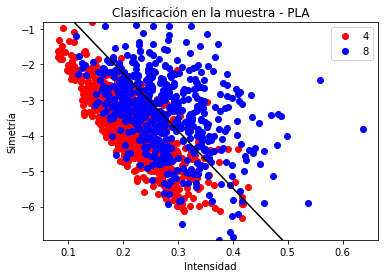

Etest - PLA:  25.136612021857925 %


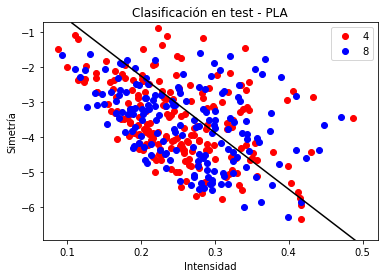



=================RL===================
Iteraciones:  3095
Ein - RL:  22.278056951423785 %


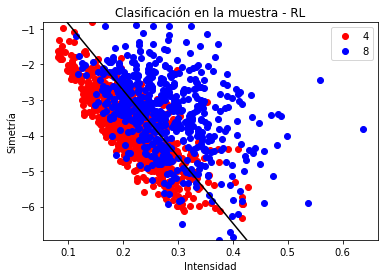

Etest - RL:  25.136612021857925 %


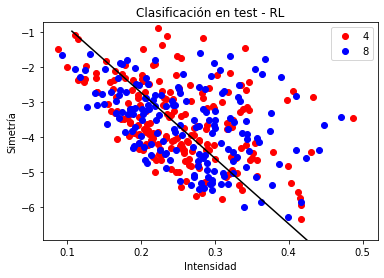



=================Pocket===================
Ein - Pocket:  25.20938023450586 %


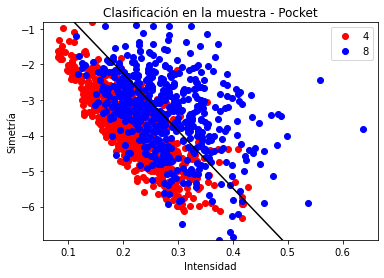

Etest - Pocket:  25.136612021857925 %


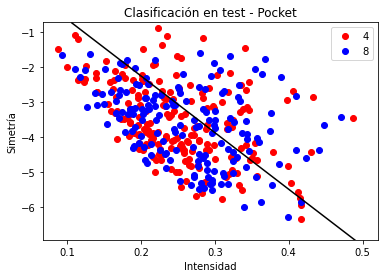

In [ ]:
# PLA
print("=================PLA===================")
print("Ein - PLA: ", cuenta_errores(x,y,w1)*100,"%")
draw_classification(x,y,w1,title="Clasificación en la muestra - PLA",xl="Intensidad",yl="Simetría")
print("Etest - PLA: ", cuenta_errores(x_test,y_test,w1)*100,"%")
draw_classification(x_test,y_test,w1,title="Clasificación en test - PLA",xl="Intensidad",yl="Simetría")


# RL
print("\n\n=================RL===================")
print("Iteraciones: ", it2)
print("Ein - RL: ", cuenta_erroresRL(x,y,w2)*100,"%")
draw_classification(x,y,w2,title="Clasificación en la muestra - RL",xl="Intensidad",yl="Simetría")
print("Etest - RL: ", cuenta_erroresRL(x_test,y_test,w2)*100,"%")
draw_classification(x_test,y_test,w2,title="Clasificación en test - RL",xl="Intensidad",yl="Simetría")

# PLA-Pocket
print("\n\n=================Pocket===================")
print("Ein - Pocket: ", cuenta_errores(x,y,w3)*100,"%")
draw_classification(x,y,w3,title="Clasificación en la muestra - Pocket",xl="Intensidad",yl="Simetría")
print("Etest - Pocket: ", cuenta_errores(x_test,y_test,w3)*100,"%")
draw_classification(x_test,y_test,w3,title="Clasificación en test - Pocket",xl="Intensidad",yl="Simetría")

Extraemos la nueva tabla de valores con la inicialización que nos da la regresión lineal: 

| Algoritmo | Ein    | Etest  |
| --------- | ------ | ------ |
| PLA       | 25,21% | 25,14% |
| RL        | 21.78% | 25,14% |
| Pocket    | 25,21% | 25,14% |

Que comparada con la anterior, inicializando con $(0,0,0)$:

| Algoritmo      | Ein    | Etest  |
| -------------- | ------ | ------ |
| PLA            | 30,9%  | 30,05% |
| RL             | 21,52% | 24,59% |
| PLA-Pocket     | 23,2%  | 24,86% |



Como podemos ver, la inicialización con el valor que nos aporta la pseudo inversa no es que mejore enormemente los resultados. Esto se debe a que la inicialización con el vector de 0s ya consigue un buen resultado teniendo en cuenta la cantidad de ruido que hay y es a eso a loque se debe el error, a la cantidad de ruido, más que a que el ajuste no sea bueno.

d) Obtener cotas sobre el verdadero valor de $E_{out}$ para los cuatro métodos empleados. Calcúlense dos cotas: una basada en $E_{in}$ y otra basada en $E_{test}$. Usar una tolerancia $δ=0,05$. ¿Qué cota es mejor? Justifique la respuesta.

Las cotas para los valores de $E_{out}$ se consiguen a raíz de despejar de la deesigualdad de Hoeffding. La primera, basada en $E_{in}$ sería:\
$\large E_{out}(h)≤E_{in}(h)+\sqrt{\frac8N\log\frac{{4·((2N)^{d_{VC}}+1)}}δ}$\
Tal y como vimos en teoría, la dimensión Vapnik-Chervonenkis viene dada por el mayor número de puntos que una clase de funciones puede separar, para el caso del perceptrón es su dimensión más 1, es decir, 3 en este caso.


In [ ]:
delta = 0.05
# Eout <= Ein + raíz...
cotapinv = cuenta_errores(x,y,w0)+np.sqrt(8/y.size*np.log((4*((2*y.size)**3+1))/delta))
cotaPLA = cuenta_errores(x,y,w1)+np.sqrt(8/y.size*np.log((4*((2*y.size)**3+1))/delta))
cotaRL = cuenta_errores(x,y,w2)+np.sqrt(8/y.size*np.log((4*((2*y.size)**3+1))/delta))
cotaPocket = cuenta_errores(x,y,w3)+np.sqrt(8/y.size*np.log((4*((2*y.size)**3+1))/delta))
print("Cota Regresión lineal: ", cotapinv)
print("Cota PLA: ", cotaPLA)
print("Cota RL: ", cotaRL)
print("Cota Pocket: ", cotaPocket)

Cota Regresión lineal:  0.6830303078157622
Cota PLA:  0.6830303078157622
Cota RL:  0.6537170749849415
Cota Pocket:  0.6830303078157622


Como podemos ver, estas cotas no nos dicen demasiado, ya que el término $(2N)^{d_{VC}}$ penaliza mucho.

Ahora, la cota basada en $E_{test}$:\
$\large E_{out}(h)≤E_{test}(h)+\sqrt{\frac1{2N}\log{\frac{2|H|}{δ}}}$\
Cabe destacar que el término $|H|$ en el conjunto de test se hace $1$ ya que para el test estamos en el caso de una única función y por tanto el tamaño de la clase es $1$

In [ ]:
delta = 0.05

cotatestpinv = cuenta_errores(x_test,y_test,w0)+np.sqrt(1/(2*y_test.size)*np.log(2/delta))
cotatestPLA = cuenta_errores(x_test,y_test,w1)+np.sqrt(1/(2*y_test.size)*np.log(2/delta))
cotatestRL = cuenta_errores(x_test,y_test,w2)+np.sqrt(1/(2*y_test.size)*np.log(2/delta))
cotatestPocket = cuenta_errores(x_test,y_test,w3)+np.sqrt(1/(2*y_test.size)*np.log(2/delta))
print("Cota Regresión lineal: ", cotatestpinv)
print("Cota PLA: ", cotatestPLA)
print("Cota RL: ", cotatestRL)
print("Cota Pocket: ", cotatestPocket)

Cota Regresión lineal:  0.32235522365119473
Cota PLA:  0.32235522365119473
Cota RL:  0.32235522365119473
Cota Pocket:  0.32235522365119473


Con esta cota en cambio, sí que podemos afirmar ya que, para una confianza del 95%, los errores fuera de la muestra se van a mantener por debajo de estos valores, que sí son semejantes a los del error dentro de la muestra.